# 1. Wstęp
Celem analizy było zbadanie i porównanie wydajności kwerend bazujących na złączeniach i zagnieżdżeniach dla tabeli geologicznej.

Analizę przeprowadzono dla różnych systemachow bazodanowych opierających się o koncept relacyjnych baz danych.
- MySQL
- PostgreSQL
- SQL Server

# 2. Konfiguracja sprzetowa i programowa

COMPUTER:
- CPU: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz   2.59 GHz
- GPU: NVIDIA GEFORCE RTX 2060
- SSD: WDC WDS100T2B0C-00PXH0
- RAM: 32,0 GB
- OS: Ubuntu 20.04.2 LTS (MySQL, PostgreSQL) & Windows 11 (SQL Server)

TOOLS:
- MySQL:  MySQL 8.0.29 for Linux on x86_64 ((Ubuntu))
- PostgreSQL: PostgreSQL 12.11 for Linux on x86_64 ((Ubuntu))
- SQL Server for Windows

IDE:
- DataGrip (Ubuntu)
- SQL Server Managment Studio (Windows)

# 3. Zapytania testowe
W celu przeprowadzenia testów stworzono tabelę Milion zawierającą syntetyczne dane o
jednorodnym rozkładzie od 0 do 999 999
Do wykonania testów użyto czterech zapytań oznaczonych jako 1ZL, 2ZL, 3ZG, 4ZG.

**a) Zapytanie 1 (1 ZL), którego celem jest złączenie syntetycznej tablicy miliona wyników ztabelą geochronologiczną w postaci zdenormalizowanej, przy czym do warunku złącze-nia dodano operację modulo, dopasowującą zakresy wartości złączanych kolumn:**

Postgres:
```
SELECT COUNT(*) AS zl1
FROM geo1.Milion
JOIN GeoTabela ON (geo1.Milion.liczba % 62) = GeoTabela.id_pietro;
```

MySQL:
```
SELECT COUNT(*) AS zlmy FROM milion INNER JOIN geotabela ON
(mod(milion.liczba,62)=(geotabela.id_pietro));
```

SQL SERVER:
```
SELECT COUNT(*) AS ZL1
FROM Milion
JOIN GeoTabela ON (Milion.liczba % 62) = GeoTabela.id_pietro;
```

**b) Zapytanie 2 (2 ZL), którego celem jest złączenie syntetycznej tablicy miliona wyników ztabelą geochronologiczną w postaci znormalizowanej, reprezentowaną przez złączenia pięciu tabel:**

Postgres:
```
SELECT COUNT(*) AS zl2
FROM geo1.Milion
JOIN geo1.GeoPietro ON (geo1.Milion.liczba % 62) = geo1.GeoPietro.id_pietro
JOIN geo1.GeoEpoka ON geo1.GeoEpoka.id_epoka = geo1.GeoPietro.id_epoka
JOIN geo1.GeoOkres ON geo1.GeoOkres.id_okres = geo1.GeoEpoka.id_okres
JOIN geo1.GeoEra ON geo1.GeoEra.id_era = geo1.GeoOkres.id_era
JOIN geo1.GeoEon ON geo1.GeoEon.id_eon = geo1.GeoEra.id_eon;

```

MySQL:
```
SELECT COUNT(*) AS zl2my FROM milion INNER JOIN geopietro ON
(mod(milion.liczba,68)=geopietro.id_pietro) NATURAL JOIN geoepoka NATURAL JOIN
geookres NATURAL JOIN geoera NATURAL JOIN geoeon;
```

SQL SERVER:
```
SELECT COUNT(*) AS ZL2
FROM Milion
JOIN GeoPietro ON (Milion.liczba % 62) = GeoPietro.id_pietro
JOIN GeoEpoka ON GeoEpoka.id_epoka = GeoPietro.id_epoka
JOIN GeoOkres ON GeoOkres.id_okres = GeoEpoka.id_okres
JOIN GeoEra ON GeoEra.id_era = GeoOkres.id_era
JOIN GeoEon ON GeoEon.id_eon = GeoEra.id_eon
```

**c) Zapytanie 3 (3 ZG), którego celem jest złączenie syntetycznej tablicy miliona wyników ztabelą geochronologiczną w postaci zdenormalizowanej, przy czym złączenie jest wy-konywane poprzez zagnieżdżenie skorelowane:**

Postgres:
```
SELECT COUNT(*) AS zg3
FROM geo1.Milion
WHERE (geo1.Milion.liczba % 62) =
(SELECT id_pietro
FROM GeoTabela
WHERE (geo1.Milion.liczba % 62) = (id_pietro));
```

MySQL
```
SELECT COUNT(*) FROM milion WHERE
mod(milion.liczba,68)=(SELECT id_pietro FROM geotabela
WHERE mod(milion.liczba,68)=(id_pietro));
```

SQL SERVER:
```
SELECT COUNT(*) AS ZG3
FROM Milion
WHERE (Milion.liczba % 62) =
(SELECT id_pietro
FROM GeoTabela
WHERE (Milion.liczba % 62) = (id_pietro));

```

**d) Zapytanie 4 (4 ZG), którego celem jest złączenie syntetycznej tablicy miliona wyników ztabelą geochronologiczną w postaci znormalizowanej, przy czym złączenie jest wyko-nywane poprzez zagnieżdżenie skorelowane, a zapytanie wewnętrzne jest złączeniem ta-bel poszczególnych jednostek geochronologicznych:**

Postgres:
```
SELECT COUNT(*) AS zg4
FROM geo1.Milion
WHERE (geo1.Milion.liczba % 62) IN
(SELECT geo1.GeoPietro.id_pietro
FROM geo1.GeoPietro
JOIN geo1.GeoEpoka ON geo1.GeoEpoka.id_epoka = geo1.GeoPietro.id_epoka
JOIN geo1.GeoOkres ON geo1.GeoOkres.id_okres = geo1.GeoEpoka.id_okres
JOIN geo1.GeoEra ON geo1.GeoEra.id_era = geo1.GeoOkres.id_era
JOIN geo1.GeoEon ON geo1.GeoEon.id_eon = geo1.GeoEra.id_eon);
```
MySQL:
```
SELECT COUNT(*) FROM milion WHERE mod(milion.liczba,68)
IN (SELECT geopietro.id_pietro FROM geopietro
NATURAL JOIN geoepoka NATURAL JOIN
geookres NATURAL JOIN geoera NATURAL JOIN geoeon);
```

SQL SERVER:
```
SELECT COUNT(*) AS ZG3
FROM Milion
WHERE (Milion.liczba % 62) =
(SELECT id_pietro
FROM GeoTabela
WHERE (Milion.liczba % 62) = (id_pietro));
```

# 4. Wyniki testow

Dla kazdego z dialektow SQL wykonano pomiary wykonywania zapytania z indeksem jak i bez indeksa.
Do zautomatyzaownia zapytan **MySQL** użyłem skryptu **bash** ktory wykonał 111 zapytan dla kazdego z podpunktow.
Natomiast dla **PostgresSQL i SQL Server** wykonano recznie 5 zapytan dlatego wyniki sa minej miarodajne dla tych dielktów powiewaz mała populacja jest narazona na wartosci odstajace.
Wszystkie wyniki zostały przedstawione na histogramach w skali logarytmicznej

### Tabela reprezentująca srednie dla MySQL:

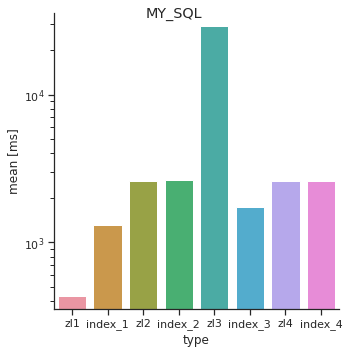

In [56]:
g = sns.catplot(x="type",y="mean [ms]", kind="bar" ,data=df, log=True)
g.fig.suptitle('MY_SQL')
print("")

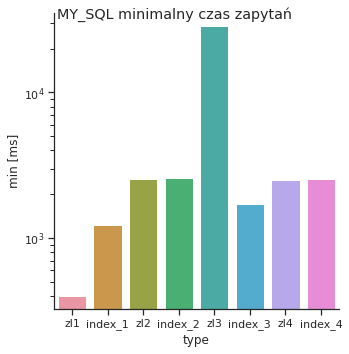

In [55]:
g2 = sns.catplot(x="type",y="min [ms]", kind="bar" ,data=df2, log=True)
g2.fig.suptitle('MY_SQL minimalny czas zapytań')
print("")

### ŚREDNIE WYNIKI DLA ZAPYTAN Z INDEKSAMI

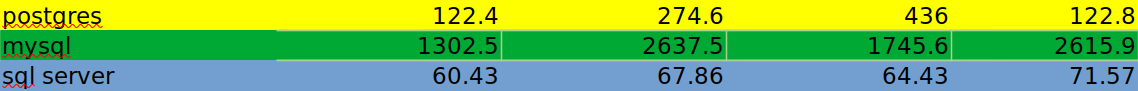

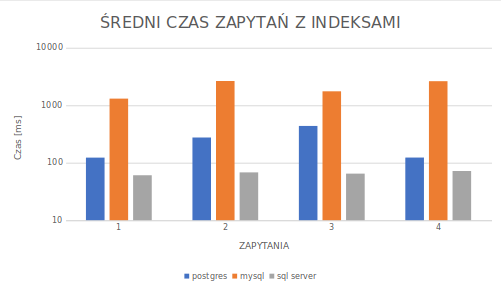

### ŚREDNIE WYNIKI DLA ZAPYTAN BEZ INDEKSÓW

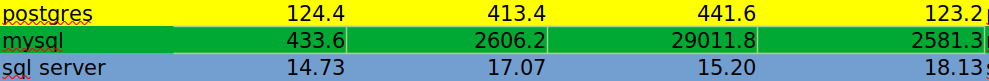

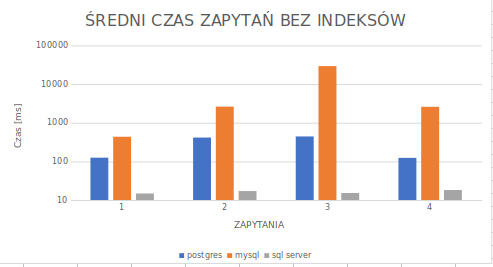

# 5. WNIOSKI

Na podstawie powyższych wynikow mozemy stwierdzić, że:
- Indeksacja poprawiła wydajność wykonywania zapytań dla złożonych operacji takich jak zagnieżdzenie natomiast dla małych tabel i  prostych zapytań wydłużyła czas wykonania

- Postać zdenormalizowana jest w wiekszosci przypadkow lepsza

- SQL Server dla użytej tabeli sprawuje się najlepiej

Ostatecznym wniskiem jest stwierdzenie ze normalizacja w wiekszosci przypadkow prowadzi do spadku wydajnosci, za to pozwala na łatwe przechowywanie danych w rozumiały sposób, zmiejsza szananse na wystąpienie błedów oraz porządkuje dane.